<h1>Graph Test</h1>

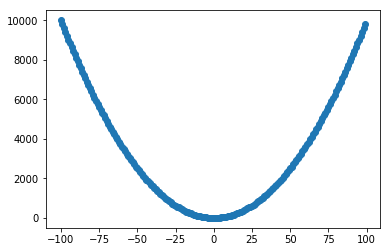

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array(list(range(-100,100)))
y=x**2
plt.scatter(x,y)
plt.show()


<h1>Mongo Client</h1>

In [16]:
from pymongo import MongoClient

client = MongoClient('127.0.0.1:27017')
db = client.Main

<h2>Get Collections in the database</h2>

In [17]:
db.collection_names()

['system.indexes', 'tweets']

<h2>Get count of tweets</h2>

In [18]:
db.tweets.count()

38

<h2>Obtain first tweet (very unefficiently)</h2>

In [58]:
doc = db.tweets.find({}).__next__()

## Some other ways to get the first tweet

In [40]:
doc = db.tweets.find_one()
print(doc)
doc = db.tweets.find().limit(1)
print(doc.next())

{'geo': None, 'source': '<a href="http://www.scorespro.com/livescore/" rel="nofollow">ScoresPro Livescore</a>', 'in_reply_to_user_id': None, 'contributors': None, 'id': 914279249066037248, 'favorite_count': 0, 'truncated': False, 'favorited': False, 'quote_count': 0, 'in_reply_to_status_id': None, 'is_quote_status': False, 'in_reply_to_user_id_str': None, 'id_str': '914279249066037248', 'user': {'default_profile_image': False, 'geo_enabled': False, 'following': None, 'friends_count': 3, 'favourites_count': 4, 'is_translator': False, 'id_str': '279629142', 'profile_link_color': 'E86717', 'follow_request_sent': None, 'listed_count': 474, 'profile_background_color': 'EEEEEE', 'followers_count': 2152, 'translator_type': 'none', 'location': 'New York', 'screen_name': 'ScoresProLive', 'profile_use_background_image': True, 'profile_sidebar_border_color': 'FFFFFF', 'verified': False, 'lang': 'en', 'notifications': None, 'profile_sidebar_fill_color': 'DDEEF6', 'name': 'ScoresPro.com Live', 'id'

<h2>Show attributes of each tweet</h2>

In [122]:
doc.keys()

dict_keys(['in_reply_to_user_id_str', 'geo', 'quote_count', 'display_text_range', 'reply_count', 'id_str', 'in_reply_to_screen_name', 'retweeted', 'timestamp_ms', 'coordinates', 'source', 'created_at', 'retweet_count', 'text', 'favorite_count', 'id', 'is_quote_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'entities', '_id', 'in_reply_to_status_id', 'truncated', 'filter_level', 'place', 'user', 'favorited', 'contributors', 'lang'])

<h2>Show attributes of the 'user' attribute</h2>

In [123]:
doc['user'].keys()

dict_keys(['follow_request_sent', 'is_translator', 'profile_link_color', 'default_profile', 'profile_sidebar_border_color', 'statuses_count', 'profile_background_image_url_https', 'profile_background_tile', 'id_str', 'profile_text_color', 'profile_image_url', 'geo_enabled', 'favourites_count', 'profile_sidebar_fill_color', 'utc_offset', 'translator_type', 'time_zone', 'created_at', 'protected', 'verified', 'following', 'profile_image_url_https', 'listed_count', 'id', 'description', 'followers_count', 'default_profile_image', 'profile_background_image_url', 'url', 'profile_background_color', 'friends_count', 'location', 'screen_name', 'contributors_enabled', 'profile_banner_url', 'name', 'notifications', 'profile_use_background_image', 'lang'])

<h2>What are the tweets from users with more than 1,000,000 followers?</h2>

In [151]:
db.tweets.count({"user.followers_count": {"$gt":1000000}})

3

In [152]:
for i in db.tweets.find({"user.followers_count": {"$gt":1000000}}):
    print('"'+i['user']['name']+'"'+str(" tweeted: \n")+i['text']+'\n\n')

"ESPN FC" tweeted: 
Toronto FC becomes the first MLS team to clinch a playoff spot. https://t.co/cfmt8eYy94


"Vogue Runway" tweeted: 
The corset trend can be shockingly sweet, as demonstrated by Elle Fanning in Toronto: https://t.co/NHcF4txvFk


"InStyle" tweeted: 
See exclusive pics of your favorite stars at the Toronto International Film Festival 2017 https://t.co/UxHGAz5fGx




<h2>How much space does the db use?</h2>

In [147]:
import time
print(time.strftime("%D %H:%M:%S"))
db.command('dbstats')

09/10/17 20:00:21


{'avgObjSize': 8020.690702087287,
 'collections': 3,
 'dataFileVersion': {'major': 4, 'minor': 5},
 'dataSize': 8453808,
 'db': 'Main',
 'extentFreeList': {'num': 0, 'totalSize': 0},
 'fileSize': 67108864,
 'indexSize': 49056,
 'indexes': 1,
 'nsSizeMB': 16,
 'numExtents': 7,
 'objects': 1054,
 'ok': 1.0,
 'storageSize': 11194368}

In [138]:
import time
print(time.strftime("%D %H:%M:%S"))
db.command('dbstats')

09/10/17 19:50:37


{'avgObjSize': 7644.026315789473,
 'collections': 3,
 'dataFileVersion': {'major': 4, 'minor': 5},
 'dataSize': 4647568,
 'db': 'Main',
 'extentFreeList': {'num': 0, 'totalSize': 0},
 'fileSize': 67108864,
 'indexSize': 32704,
 'indexes': 1,
 'nsSizeMB': 16,
 'numExtents': 6,
 'objects': 608,
 'ok': 1.0,
 'storageSize': 5529600}